## DonorsChoose Funding Analysis 
<br>
DonorsChoose is an innovative platform that connects donors with teachers from across the United States to fund school projects. These projects range from simple supplies for a science experiment to funds for field trips, providing resources that schools otherwise might not afford. In this project, you will analyze data from the DonorsChoose platform to identify patterns in funding, project success, and factors that influence donor contributions.



Download the specified CSV files from Canvas and load them into Python for analysis.

In [77]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [78]:
# Load data
project = pd.read_csv("/Users/wally/Library/CloudStorage/OneDrive-Personal/Documents/Cornell/0. MPS (4th year sem 2)/MPS Spring '24/NBA 6215 Python for Business/data_for_final_project/project.csv")

donation = pd.read_csv("/Users/wally/Library/CloudStorage/OneDrive-Personal/Documents/Cornell/0. MPS (4th year sem 2)/MPS Spring '24/NBA 6215 Python for Business/data_for_final_project/donation.csv")

school = pd.read_csv("/Users/wally/Library/CloudStorage/OneDrive-Personal/Documents/Cornell/0. MPS (4th year sem 2)/MPS Spring '24/NBA 6215 Python for Business/data_for_final_project/school.csv")

account = pd.read_csv("/Users/wally/Library/CloudStorage/OneDrive-Personal/Documents/Cornell/0. MPS (4th year sem 2)/MPS Spring '24/NBA 6215 Python for Business/data_for_final_project/account.csv",dtype={5: str}) #requires data type specification for column 5

In [79]:
# Rename columns for consistency with other files
donation = donation.rename(columns={'donoracctid':'accountid'})
project = project.rename(columns={'teacheracctid':'accountid'})

In [171]:
# Merge files to a combined dataframe
tmp0 = project.merge(donation, on=['accountid', 'projectid'], how='outer')
tmp1 = tmp0.merge(school, on='schoolid', how='outer')
combined_df_raw = tmp1.merge(account,on='accountid', how='outer')

In [172]:
# Remove NA values from the donation_to_project column (imperative column)
combined_df = combined_df_raw.dropna(subset=['donation_to_project'])

In [82]:
# Sort by accountid
pd.set_option('display.max_columns', 500)
combined_df.sort_values('accountid')

# Show df
combined_df

,projectid,accountid,schoolid,primary_focus_subject,primary_focus_area,secondary_focus_subject,secondary_focus_area,resource_type,poverty_level,grade_level,vendor_shipping_charges,sales_tax,payment_processing_charges,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached,total_donations,num_donors,eligible_double_your_impact_match,eligible_almost_home_match,funding_status,date_posted,date_completed,date_thank_you_packet_mailed,date_expiration,donationid,donation_timestamp,donation_to_project,donation_optional_support,donation_total,donation_included_optional_support,payment_method,payment_included_acct_credit,payment_included_campaign_gift_card,payment_included_web_purchased_gift_card,payment_was_promo_matched,is_teacher_referred,givingpageid,giving_page_type,for_honoree,thank_you_packet_mailed,ncesid,latitude,longitude,city_x,state_x,zip,metro,district,county,charter,magnet,year_round,nlns,kipp,charter_ready_promise,city_y,state_y,zip3,is_teacher,teacher_prefix,teacher_teach_for_america,teacher_ny_teaching_fellow
68,147974.0,14659,2.0,Literacy,Literacy & Language,Literature & Writing,Literacy & Language,Books,highest poverty,Grades 9-12,32.14,0.0,4.82,9.0,367.35,447.99,200.0,447.99,3.0,1.0,0.0,completed,2009-08-12 00:00:00,2009-09-08 00:00:00,2009-12-04 00:00:00,2010-01-13 00:00:00,4905337.0,2009-08-21 09:06:42,20.50,4.50,25.0,1.0,creditcard,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,3.600077e+11,40.765517,-73.96009,New York City,NY,10065.0,NaN,New York City Dept Of Ed,New York (Manhattan),0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,Ms.,0.0,0.0
74,212598.0,14659,2.0,Literacy,Literacy & Language,Literature & Writing,Literacy & Language,Other,highest poverty,Grades 9-12,22.56,0.0,3.38,35.0,286.54,329.36,200.0,325.62,6.0,0.0,1.0,completed,2010-07-23 00:00:00,2010-09-08 00:00:00,2011-01-18 00:00:00,2010-12-23 00:00:00,3409988.0,2010-09-02 22:15:55,43.50,6.50,50.0,1.0,creditcard,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,3.600077e+11,40.765517,-73.96009,New York City,NY,10065.0,NaN,New York City Dept Of Ed,New York (Manhattan),0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,Ms.,0.0,0.0
90,802020.0,14659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,556299.0,2015-02-13 14:58:54,42.50,7.50,50.0,1.0,no_cash_received,0.0,0.0,1.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Ms.,0.0,0.0
91,778850.0,14659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,935423.0,2014-12-02 17:51:10,8.50,1.50,10.0,1.0,paypal,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Ms.,0.0,0.0
105,110794.0,34241,3.0,Literacy,Literacy & Language,Special Needs,Special Needs,Technology,moderate poverty,Grades PreK-2,23.32,0.0,5.83,17.0,279.00,340.24,25.0,348.75,2.0,0.0,0.0,completed,2008-11-22 00:00:00,2009-04-21 00:00:00,2009-04-24 00:00:00,2009-04-23 00:00:00,2725696.0,2008-12-12 20:17:57,20.00,5.00,25.0,1.0,no_cash_received,0.0,1.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,3.600077e+11,40.770233,-73.95076,New York City,NY,10075.0,NaN,New York City Dept Of Ed,New York (Manhattan),0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,Ms.,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7179429,70405.0,2855583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6211919.0,2008-03-31 14:12:13,85.00,15.00,100.0,1.0,no_cash_received,0.0,1.0,0.0,0.0,0.0,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West Hollywood,CA,900.0,0.0,NaN,NaN,NaN
7179430,1084050.0,2855584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62

## Basic Data Examination

##### % Teachers in the dataframe as opposed to donors

In [83]:
sum(combined_df['is_teacher'])/len(combined_df)

0.14846402646766976

##### Number of Cities and Schools per City

In [84]:
combined_df_filtered_by_city = combined_df.dropna(subset="city_x")
city_school_counts = combined_df_filtered_by_city['city_x'].value_counts()
city_school_counts

city_x
New York City    30097
Los Angeles      12684
Chicago          12640
Philadelphia      6533
Indianapolis      5370
                 ...  
Unalakleet           1
Parmelee             1
Cankton              1
Halliday             1
Shasta Lake          1
Name: count, Length: 7254, dtype: int64

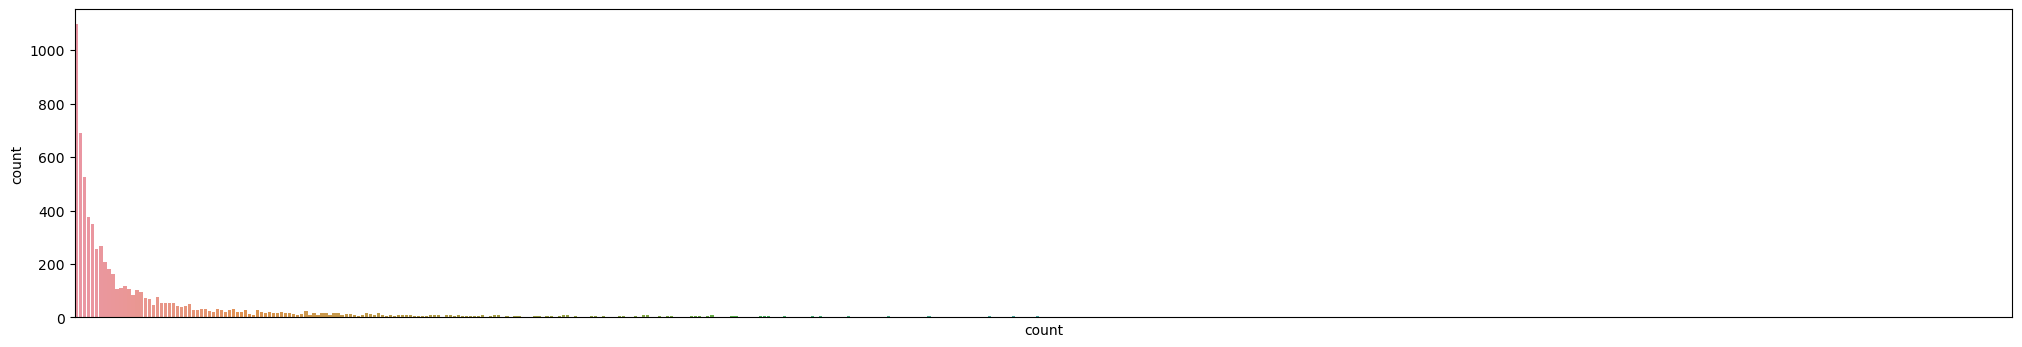

In [85]:
plt.figure(figsize=(25, 4))
sns.countplot(x=city_school_counts)
plt.xticks([])
plt.show()  # There is a long tail

## Examine effect of being a NY Teaching Fellow on donation amounts

In [86]:
# Remove NA values from teachng fellow column
teaching_fellow_na_removed = combined_df.dropna(subset=['teacher_ny_teaching_fellow'])

# Filter by unique results (whether or not teacher is NY fellow)
unique_teaching_fellow = teaching_fellow_na_removed['teacher_ny_teaching_fellow'].unique()

# Create filtered datasets containing only data if the teacher is a teaching fellow or not
for i in unique_teaching_fellow:
    if i == 0:
        is_not_ny_teaching_fellow = teaching_fellow_na_removed[teaching_fellow_na_removed['teacher_ny_teaching_fellow']==i]
    if i == 1:
        is_ny_teaching_fellow = teaching_fellow_na_removed[teaching_fellow_na_removed['teacher_ny_teaching_fellow']==i]

In [87]:
# See summary stats
print("NOT a NY Teaching Fellow")
print(is_not_ny_teaching_fellow["donation_to_project"].describe())

print("\nIS a NY Teaching Fellow")
print(is_ny_teaching_fellow["donation_to_project"].describe())

NOT a NY Teaching Fellow
count    873348.000000
mean         40.322972
std         235.561233
min           0.000000
25%           1.700000
50%          10.000000
75%          28.900000
max       21299.950000
Name: donation_to_project, dtype: float64

IS a NY Teaching Fellow
count    8179.000000
mean       57.010252
std       148.054790
min         0.020000
25%         8.500000
50%        24.540000
75%        75.000000
max      8500.000000
Name: donation_to_project, dtype: float64


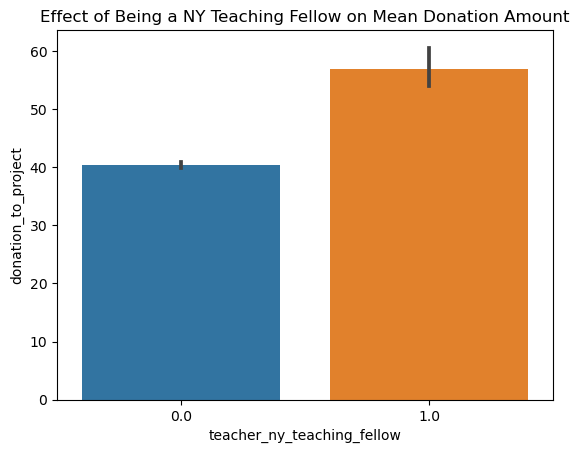

In [88]:
# Visualize barplot of donation distribution
sns.barplot(teaching_fellow_na_removed, x='teacher_ny_teaching_fellow', y='donation_to_project', )
plt.title('Effect of Being a NY Teaching Fellow on Mean Donation Amount')
plt.show()

## Examine Impact of total_price_excluding_optional_support on Project Funding Completion Status

<Axes: xlabel='total_price_excluding_optional_support', ylabel='Density'>

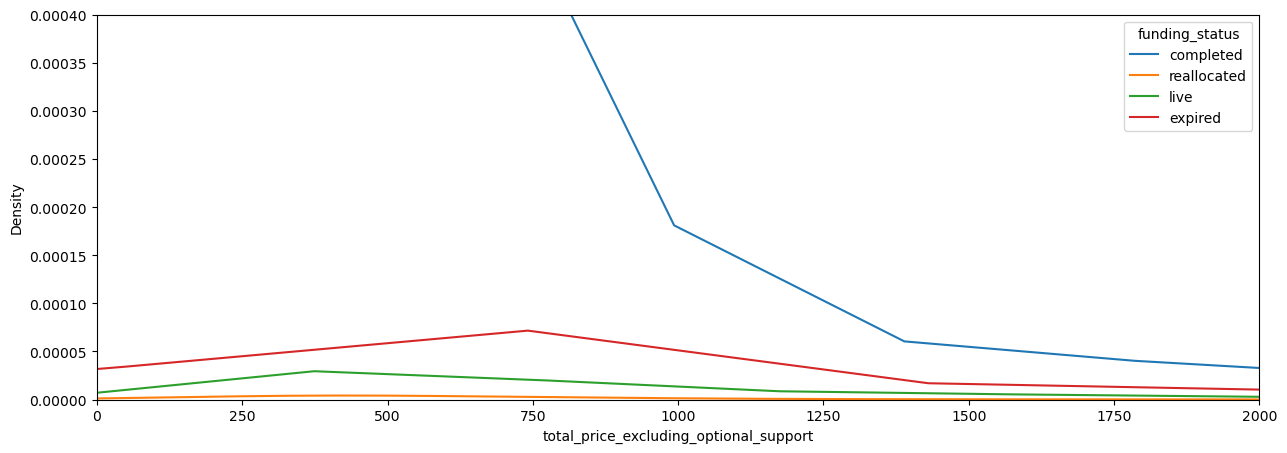

In [183]:
plt.figure(figsize=(15,5))
plt.xlim([0,2000])
plt.ylim([0,0.0004])
sns.kdeplot(data=combined_df, x='total_price_excluding_optional_support', hue='funding_status')

/Users/wally/anaconda3/envs/amex/lib/python3.11/site-packages/matplotlib/scale.py:616: RuntimeWarning: overflow encountered in power
  return 1.0 / (1 + 10**(-a))


<Axes: xlabel='total_price_excluding_optional_support', ylabel='Density'>

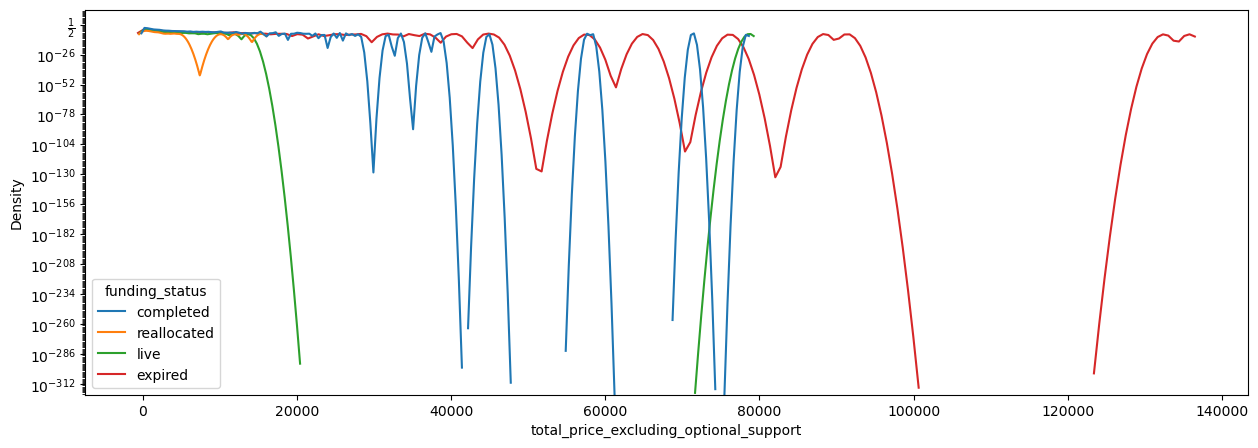

In [116]:
# Using logit scale
plt.figure(figsize=(15,5))
plt.yscale('logit')
sns.kdeplot(data=combined_df, x='total_price_excluding_optional_support', hue='funding_status')

## Visualize Poverty Level and Focus Areas Distribution and Correlation with Fund Raising Success

/var/folders/qy/mhlfbdm940n8kbpppfc_whdh0000gn/T/ipykernel_6210/2127007643.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


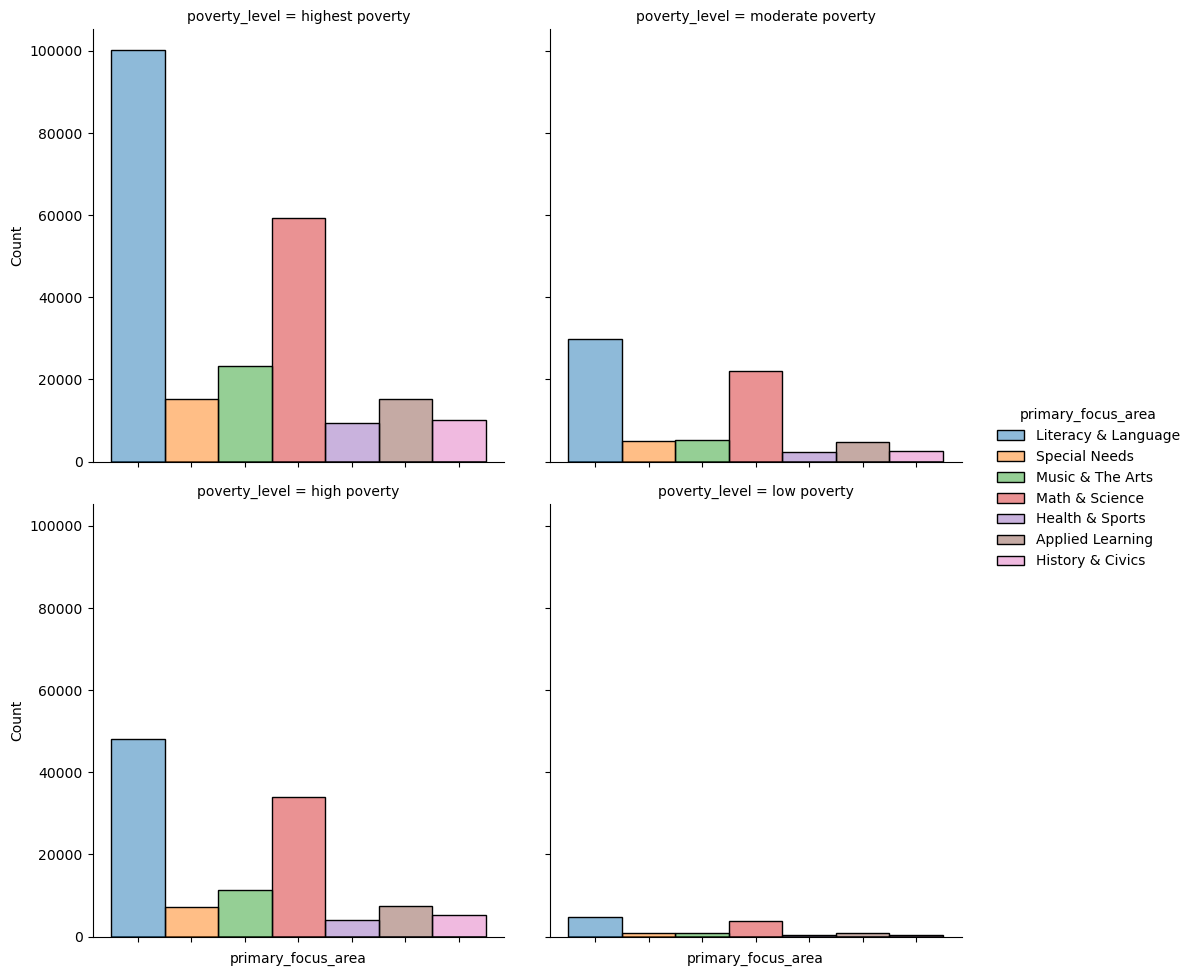

In [137]:
g = sns.displot(data=combined_df, x='primary_focus_area', col='poverty_level', hue='primary_focus_area', col_wrap=2)
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.show()

In [174]:
# Calculate percentage of successful funding completions for each category
success_percentages = combined_df.groupby(['primary_focus_area', 'poverty_level'])['funding_status'] \
    .apply(lambda x: (x == 'completed').mean() * 100) \
    .reset_index(name='success_percentage')

# Add a column with the count of each focus area within each poverty level
success_percentages['total count'] = combined_df.groupby(['primary_focus_area', 'poverty_level']).size().reset_index(name='count')['count']

success_percentages['avg_total_price'] = combined_df.groupby(['primary_focus_area', 'poverty_level'])['total_price_excluding_optional_support'].mean().values

success_percentages = success_percentages.sort_values('success_percentage', ascending=False)

success_percentages

,primary_focus_area,poverty_level,success_percentage,total count,avg_total_price
8,History & Civics,high poverty,89.069811,5343,967.423056
3,Applied Learning,moderate poverty,88.825032,4698,730.411220
2,Applied Learning,low poverty,88.726790,754,641.458554
9,History & Civics,highest poverty,88.496902,10006,1187.729684
21,Music & The Arts,highest poverty,88.189755,23251,707.542980
11,History & Civics,moderate poverty,87.739752,2659,704.772738
1,Applied Learning,highest poverty,87.640596,15292,700.886514
13,Literacy & Language,highest poverty,87.473565,100244,540.250321
15,Literacy & Language,moderate poverty,87.458525,29837,564.386815
20,Music & The Arts,high poverty,87.231441,11450,690.634999


## Aditi Code

________________________________________________

## percentage of successful funding completions for each poverty level

In [72]:
metro_success_percentages = combined_df.groupby('metro')['funding_status'] \
    .apply(lambda x: (x == 'completed').mean() * 100) \
    .reset_index(name='success_percentage')

metro_success_percentages

,metro,success_percentage
0,rural,85.231511
1,suburban,86.278050
2,urban,88.148865


In [64]:
poverty_success_percentages = combined_df.groupby('poverty_level')['funding_status'] \
    .apply(lambda x: (x == 'completed').mean() * 100) \
    .reset_index(name='success_percentage')

poverty_success_percentages

,poverty_level,success_percentage
0,high poverty,86.719913
1,highest poverty,87.028032
2,low poverty,84.630739
3,moderate poverty,87.204154


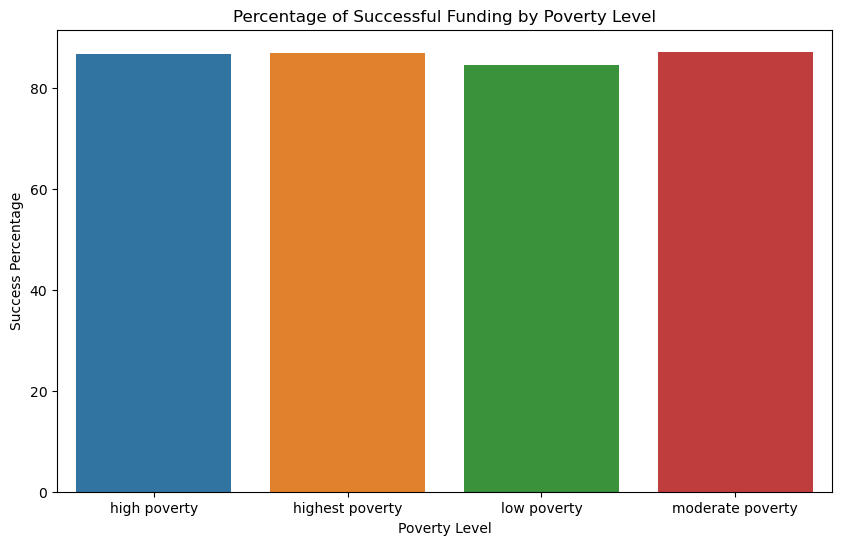

In [65]:
plt.figure(figsize=(10, 6))
sns.barplot(data=poverty_success_percentages, x='poverty_level', y='success_percentage')
plt.title('Percentage of Successful Funding by Poverty Level')
plt.xlabel('Poverty Level')
plt.ylabel('Success Percentage')
plt.show()

In [67]:
resource_success_percentages = combined_df.groupby('resource_type')['funding_status'] \
    .apply(lambda x: (x == 'completed').mean() * 100) \
    .reset_index(name='success_percentage')

resource_success_percentages

,resource_type,success_percentage
0,Books,90.358356
1,Other,89.904439
2,Supplies,87.252974
3,Technology,84.123224
4,Trips,88.834873
5,Visitors,86.960784


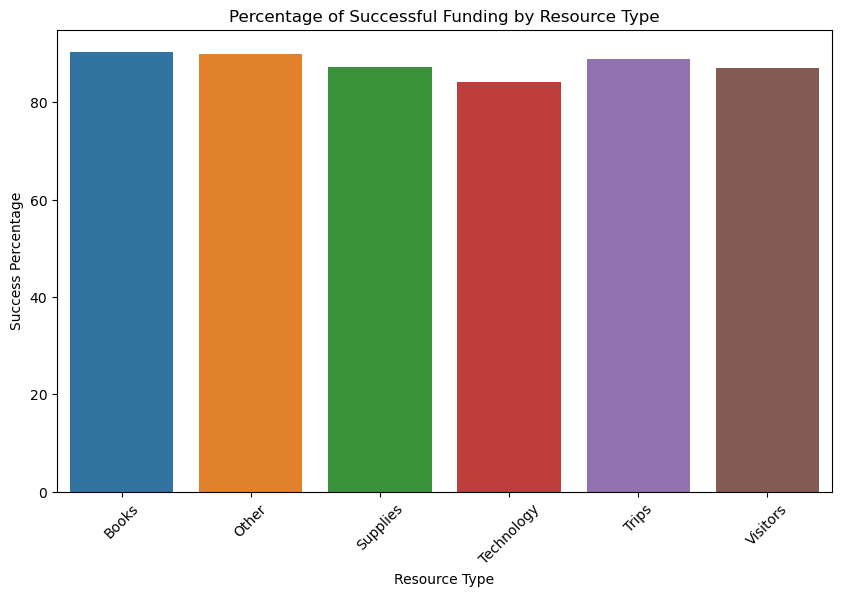

In [71]:
plt.figure(figsize=(10, 6))
sns.barplot(data=resource_success_percentages, x='resource_type', y='success_percentage')
plt.title('Percentage of Successful Funding by Resource Type')
plt.xlabel('Resource Type')
plt.ylabel('Success Percentage')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

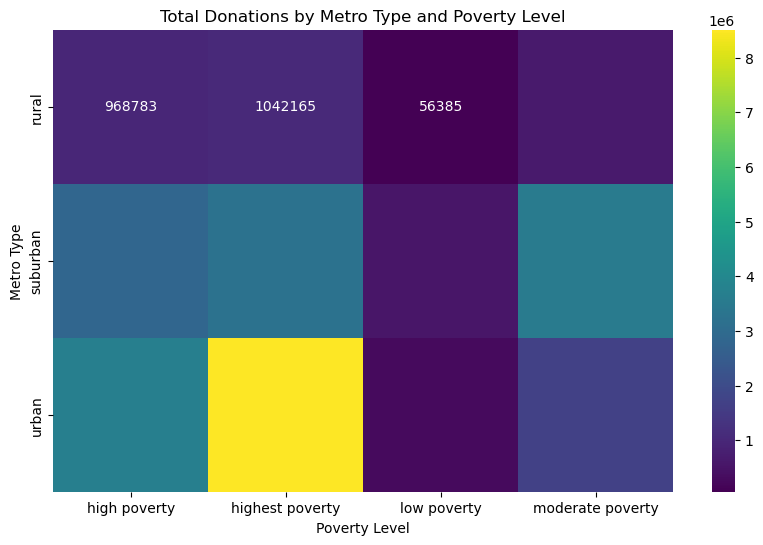

In [73]:

total_donations_per_group = combined_df.groupby(['metro', 'poverty_level'])['donation_to_project'].sum().reset_index()

pivot_table = total_donations_per_group.pivot(index='metro', columns='poverty_level', values='donation_to_project')

# heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data=pivot_table, annot=True, cmap='viridis', fmt='.0f')
plt.title('Total Donations by Metro Type and Poverty Level')
plt.xlabel('Poverty Level')
plt.ylabel('Metro Type')
plt.show()

/var/folders/m2/f1xv81ts7w73wj1z1dys855h0000gn/T/ipykernel_20846/1883305357.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=total_donations_per_group, x='metro', y='donation_to_project', hue='poverty_level', ci=None)


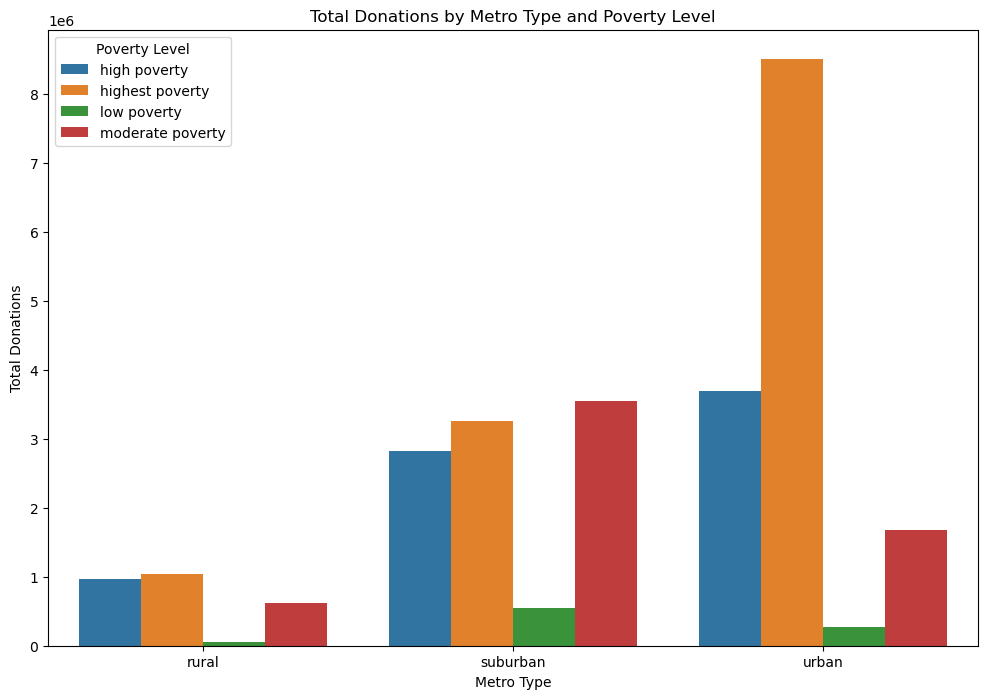

In [74]:
plt.figure(figsize=(12, 8))
sns.barplot(data=total_donations_per_group, x='metro', y='donation_to_project', hue='poverty_level', ci=None)
plt.title('Total Donations by Metro Type and Poverty Level')
plt.xlabel('Metro Type')
plt.ylabel('Total Donations')
plt.legend(title='Poverty Level')
plt.show()

________________________________________________________________________________________________

## Old Code for Wally's Section

In [8]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
donation[["donation_to_project", "donation_optional_support", "donation_total"]].describe()

,donation_to_project,donation_optional_support,donation_total
count,6211956.00,6211956.00,6211956.00
mean,69.73,10.94,80.66
std,247.89,37.82,280.89
min,-12.75,-2.25,-15.00
25%,10.00,1.50,10.00
50%,21.25,3.75,25.00
75%,53.76,7.50,61.20
max,147204.00,21996.00,169200.00


<Axes: xlabel='payment_method', ylabel='count'>

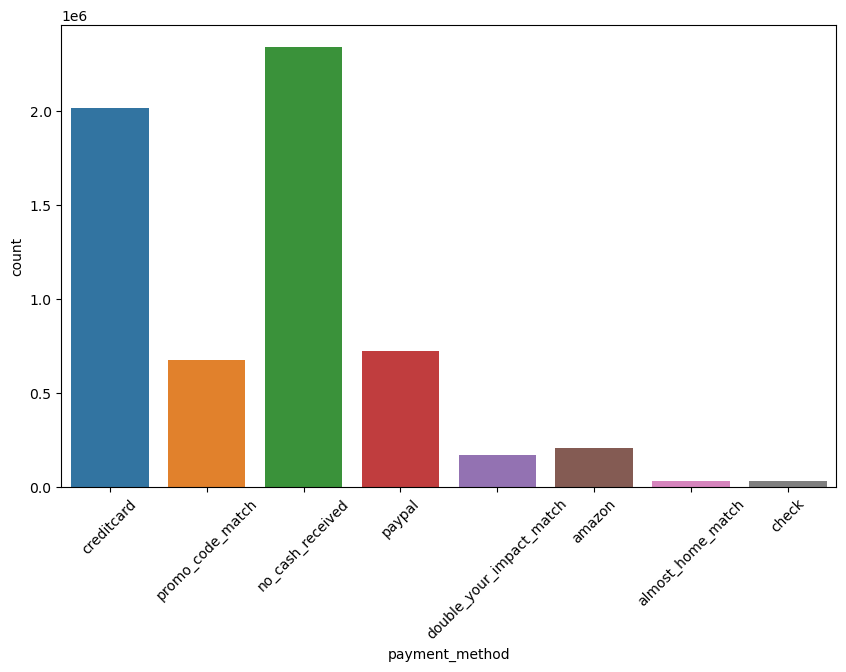

In [9]:
plt.figure(figsize=(10, 6))
plt.xticks(rotation=45)
sns.countplot(data=donation, x='payment_method')

<Axes: xlabel='payment_method', ylabel='donation_to_project'>

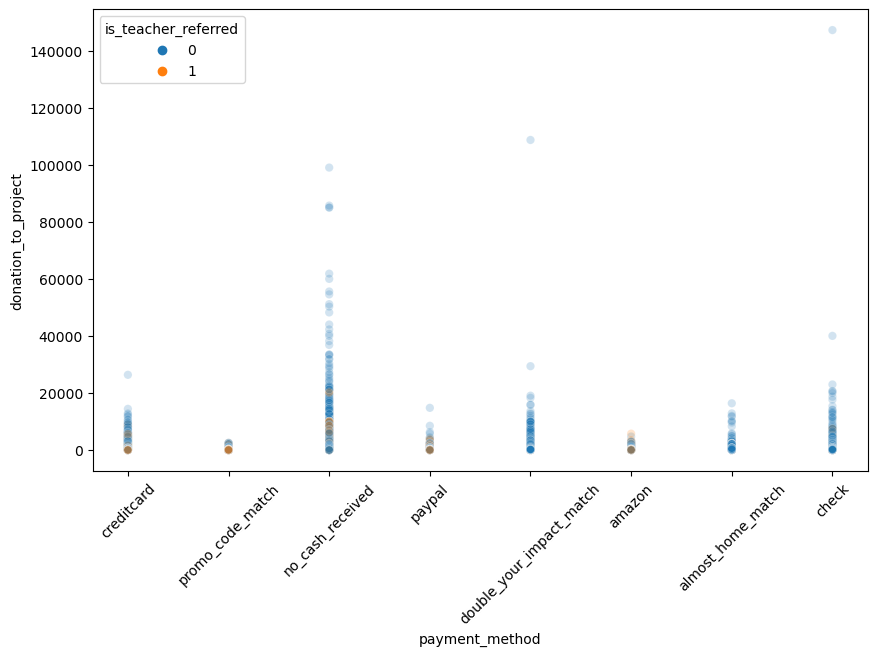

In [23]:
plt.figure(figsize=(10, 6))
plt.xticks(rotation=45)
sns.scatterplot(data=donation, x='payment_method', y='donation_to_project', hue='is_teacher_referred', alpha=0.2)

In [199]:
donation_df = combined_df.drop(columns=['projectid', 'accountid', 'donation_timestamp', 'givingpageid', 'date_posted', 'donationid', 'donation_included_optional_support', 'city_x', 'state_x', 'district', 'county', 'teacher_prefix', 'date_completed', 'date_thank_you_packet_mailed', 'date_expiration'])

In [200]:
donation_df = pd.get_dummies(donation_df, columns=["giving_page_type", "payment_method", "primary_focus_subject", "secondary_focus_area", "resource_type", "poverty_level", "grade_level", 'funding_status', 'primary_focus_area', 'secondary_focus_subject'])

In [201]:
donation_df.head()

,schoolid,vendor_shipping_charges,sales_tax,payment_processing_charges,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached,total_donations,num_donors,eligible_double_your_impact_match,eligible_almost_home_match,donation_to_project,donation_optional_support,donation_total,payment_included_acct_credit,payment_included_campaign_gift_card,payment_included_web_purchased_gift_card,payment_was_promo_matched,is_teacher_referred,for_honoree,thank_you_packet_mailed,ncesid,latitude,longitude,zip,metro,charter,magnet,year_round,nlns,kipp,charter_ready_promise,city_y,state_y,zip3,is_teacher,teacher_teach_for_america,teacher_ny_teaching_fellow,giving_page_type_campaign,giving_page_type_teacher,payment_method_almost_home_match,payment_method_amazon,payment_method_check,payment_method_creditcard,payment_method_double_your_impact_match,payment_method_no_cash_received,payment_method_paypal,payment_method_promo_code_match,primary_focus_subject_Applied Sciences,primary_focus_subject_Character Education,primary_focus_subject_Civics & Government,primary_focus_subject_College & Career Prep,primary_focus_subject_Community Service,primary_focus_subject_ESL,primary_focus_subject_Early Development,primary_focus_subject_Economics,primary_focus_subject_Environmental Science,primary_focus_subject_Extracurricular,primary_focus_subject_Financial Literacy,primary_focus_subject_Foreign Languages,primary_focus_subject_Gym & Fitness,primary_focus_subject_Health & Life Science,primary_focus_subject_Health & Wellness,primary_focus_subject_History & Geography,primary_focus_subject_Literacy,primary_focus_subject_Literature & Writing,primary_focus_subject_Mathematics,primary_focus_subject_Music,primary_focus_subject_Nutrition,primary_focus_subject_Other,primary_focus_subject_Parent Involvement,primary_focus_subject_Performing Arts,primary_focus_subject_Social Sciences,primary_focus_subject_Special Needs,primary_focus_subject_Team Sports,primary_focus_subject_Visual Arts,secondary_focus_area_Applied Learning,secondary_focus_area_Health & Sports,secondary_focus_area_History & Civics,secondary_focus_area_Literacy & Language,secondary_focus_area_Math & Science,secondary_focus_area_Music & The Arts,secondary_focus_area_Special Needs,resource_type_Books,resource_type_Other,resource_type_Supplies,resource_type_Technology,resource_type_Trips,resource_type_Visitors,poverty_level_high poverty,poverty_level_highest poverty,poverty_level_low poverty,poverty_level_moderate poverty,grade_level_Grades 3-5,grade_level_Grades 6-8,grade_level_Grades 9-12,grade_level_Grades PreK-2,funding_status_completed,funding_status_expired,funding_status_live,funding_status_reallocated,primary_focus_area_Applied Learning,primary_focus_area_Health & Sports,primary_focus_area_History & Civics,primary_focus_area_Literacy & Language,primary_focus_area_Math & Science,primary_focus_area_Music & The Arts,primary_focus_area_Special Needs,secondary_focus_subject_Applied Sciences,secondary_focus_subject_Character Education,secondary_focus_subject_Civics & Government,secondary_focus_subject_College & Career Prep,secondary_focus_subject_Community Service,secondary_focus_subject_ESL,secondary_focus_subject_Early Development,secondary_focus_subject_Economics,secondary_focus_subject_Environmental Science,secondary_focus_subject_Extracurricular,secondary_focus_subject_Financial Literacy,secondary_focus_subject_Foreign Languages,secondary_focus_subject_Gym & Fitness,secondary_focus_subject_Health & Life Science,secondary_focus_subject_Health & Wellness,secondary_focus_subject_History & Geography,secondary_focus_subject_Literacy,secondary_focus_subject_Literature & Writing,secondary_focus_subject_Mathematics,secondary_focus_subject_Music,secondary_focus_subject_Nutrition,secondary_focus_subject_Other,secondary_focus_subject_Parent Involvement,secondary_focus_subject_Performing Arts,secondary_focus_subject_Social Sciences,secondary_focus_subject_

In [202]:
data_train, data_test = train_test_split(donation_df)

In [203]:
X_train, X_test = data_train.drop(columns=["donation_total", "donation_to_project", "donation_optional_support"]), data_test.drop(columns=["donation_total", "donation_to_project", "donation_optional_support"])

y_train, y_test = data_train["donation_to_project"], data_test["donation_to_project"]

In [204]:
clf = LinearRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

ValueError: could not convert string to float: 'suburban'

In [17]:
len(data_test['donationid'])

1552989

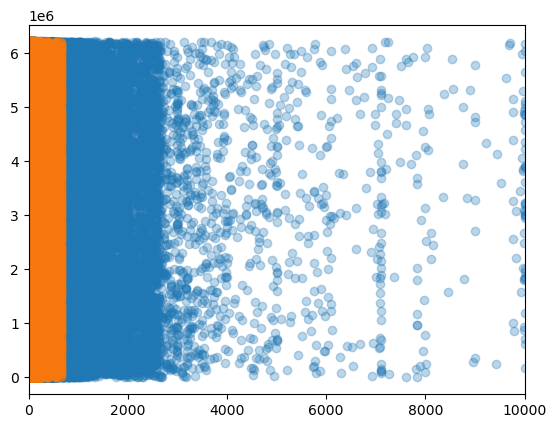

In [18]:
plt.scatter(data_test['donation_total'], data_test['total_price_excluding_optional_support'], alpha=0.3)
plt.scatter(y_pred, data_test['donationid'], alpha=0.1)
plt.xlim(0, 10000)  # Set the limit for x-axis
plt.show()